In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import numpy as np #Import numpy

# 1. Load the Data
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')  # Specify UTF-8 encoding
print(data.head())
print(data.info())

# 2. Data Preprocessing
# Drop unnecessary columns
data = data.drop(['UDI'], axis=1)  # Drop UDI
data = data.drop(['Product ID'], axis=1)  # Drop Product ID


# Define numerical and categorical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']
target = 'Target'  # The column name is now Target

# ***ADD THIS LINE TO PRINT THE COLUMN NAMES***
print("Columns in the DataFrame:", data.columns)

# 3. Create Preprocessing Pipelines
# Numerical pipeline: Impute missing values (if any) and then scale
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize
])

# Categorical pipeline: One-hot encode
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unknown categories
])

# 4. Combine Pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
], remainder='passthrough') # all other columns are passed through

# 5. Split data into training and testing
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  #stratify to keep the distribution between train and test set

# 6. Apply the preprocessing
X_train = preprocessor.fit_transform(X_train) # Fit and transform on training data
X_test = preprocessor.transform(X_test)       # Transform on test data
# Verify the shape of the processed data
print("Shape of X_train after preprocessing:", X_train.shape)
print("Shape of X_test after preprocessing:", X_test.shape)
print(X_train)
print(X_test)

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (tota

Data shape: (10000, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Type                     10000 non-null  object  
 1   Air temperature [K]      10000 non-null  float64 
 2   Process temperature [K]  10000 non-null  float64 
 3   Rotational speed [rpm]   10000 non-null  int64   
 4   Torque [Nm]              10000 non-null  float64 
 5   Tool wear [min]          10000 non-null  int64   
 6   Target                   10000 non-null  category
 7   Failure Type             10000 non-null  category
dtypes: category(2), float64(3), int64(2), object(1)
memory usage: 488.7+ KB
None

Descriptive Statistics:
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               31

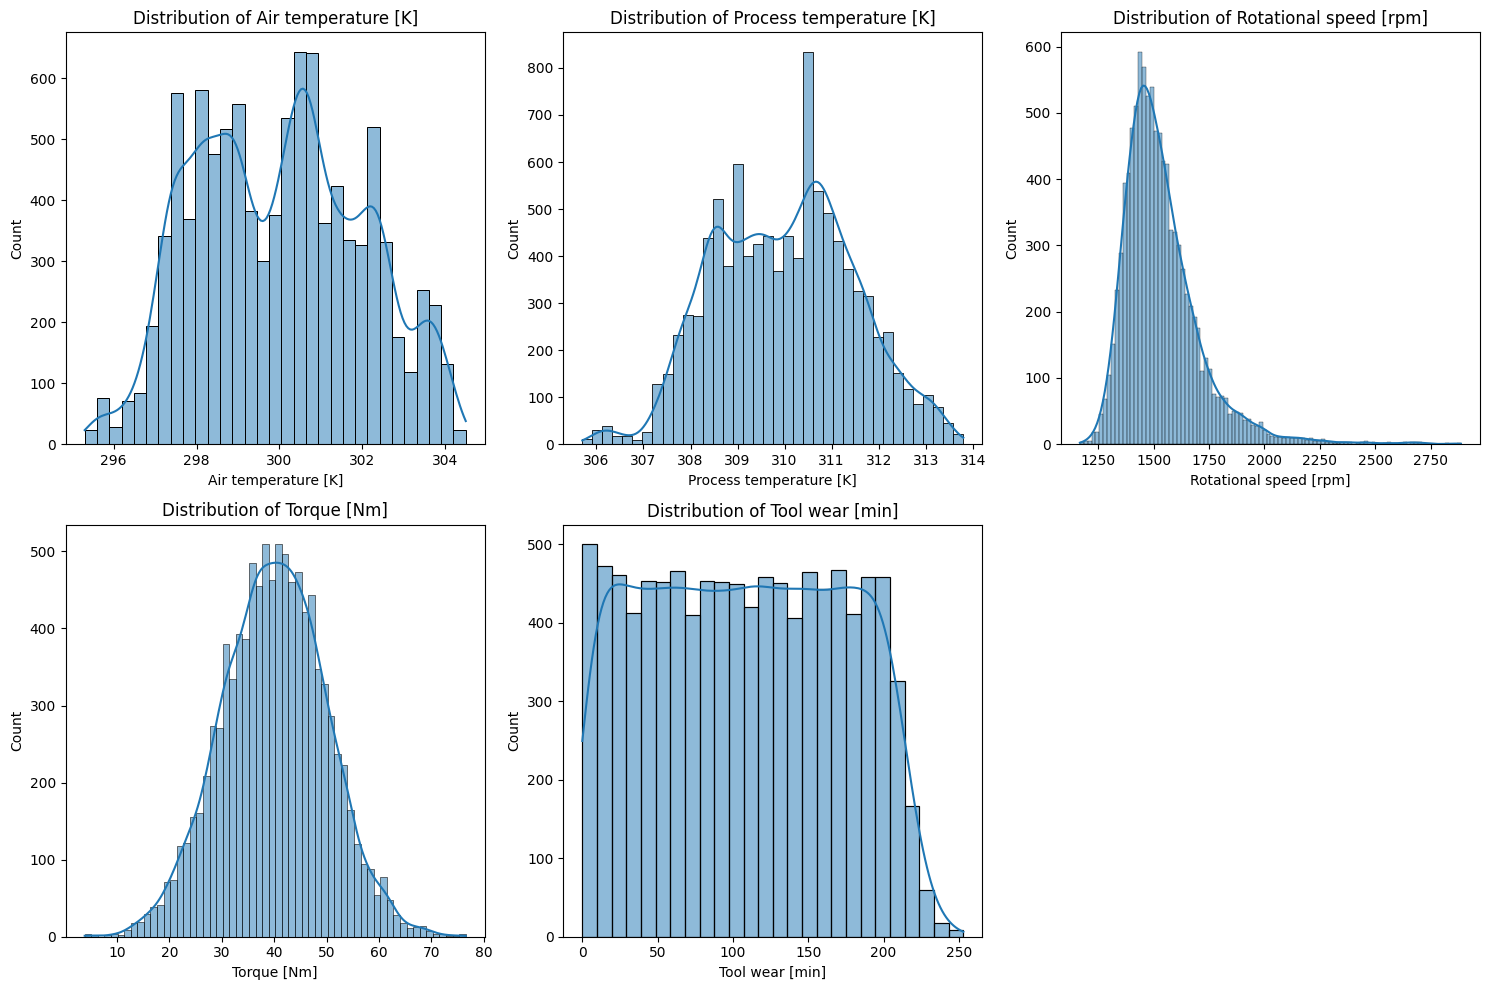

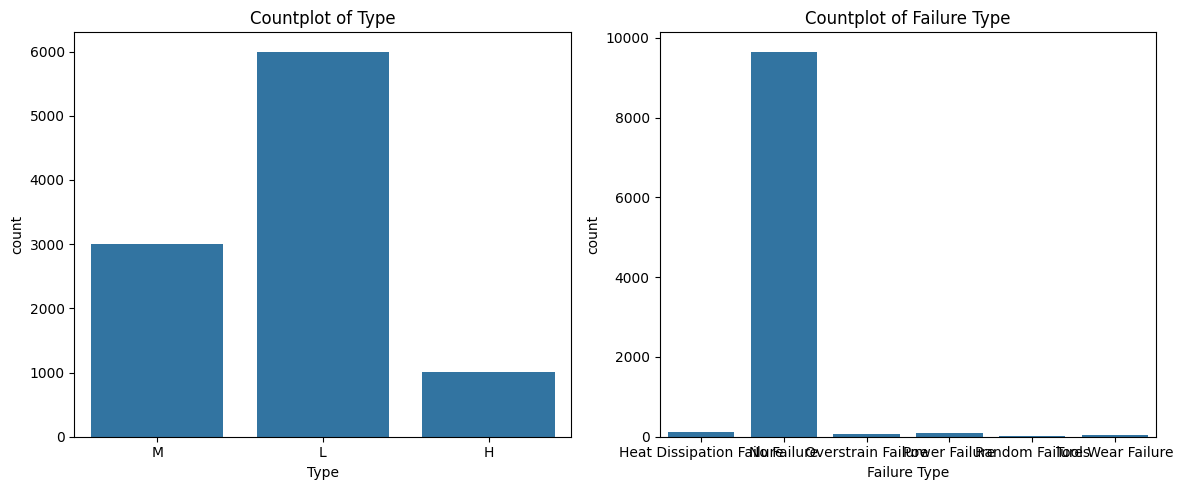

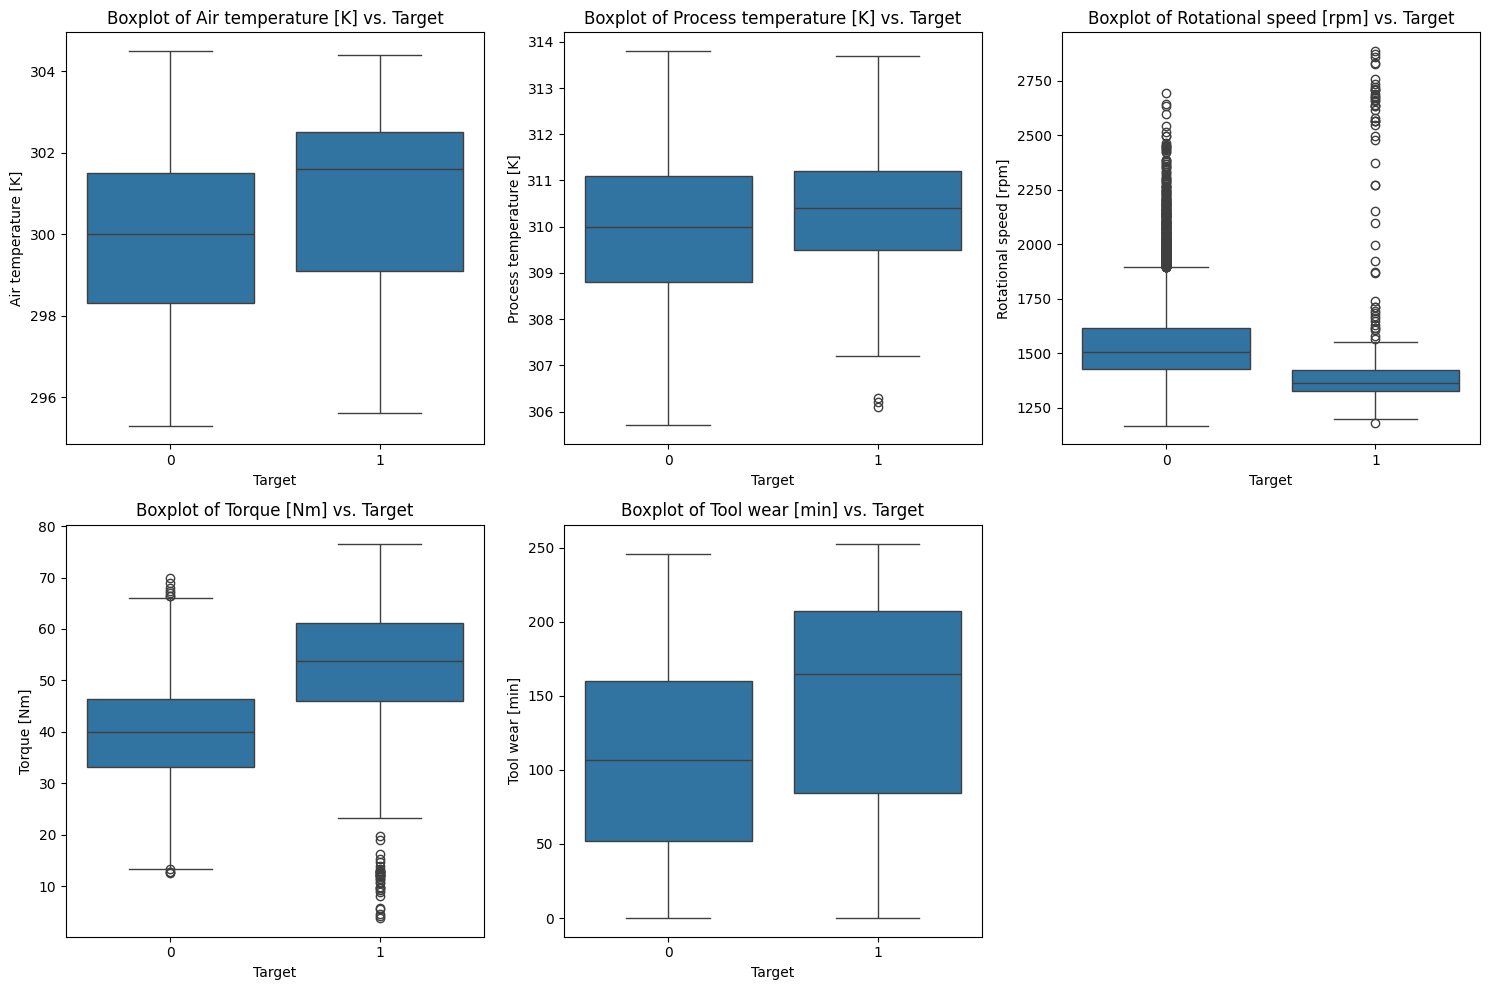

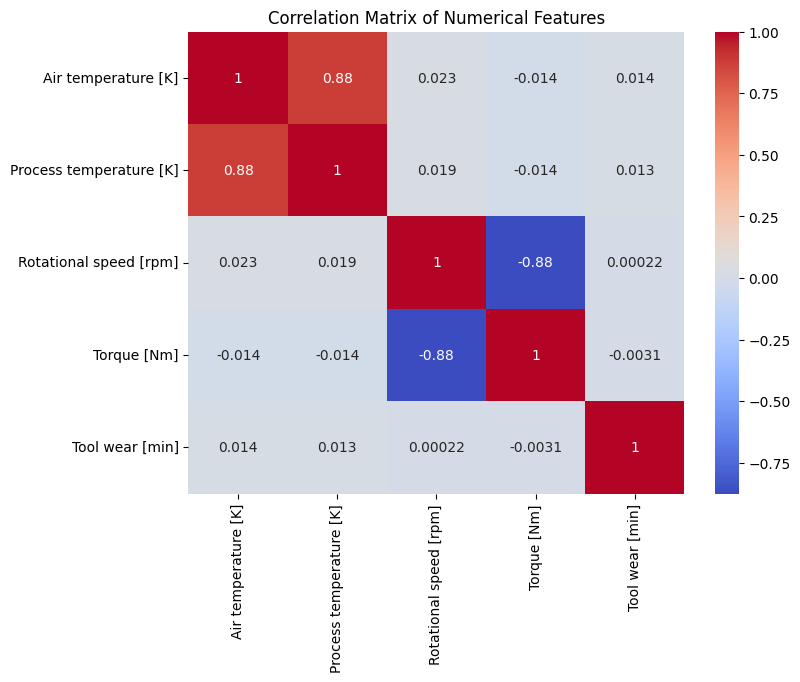

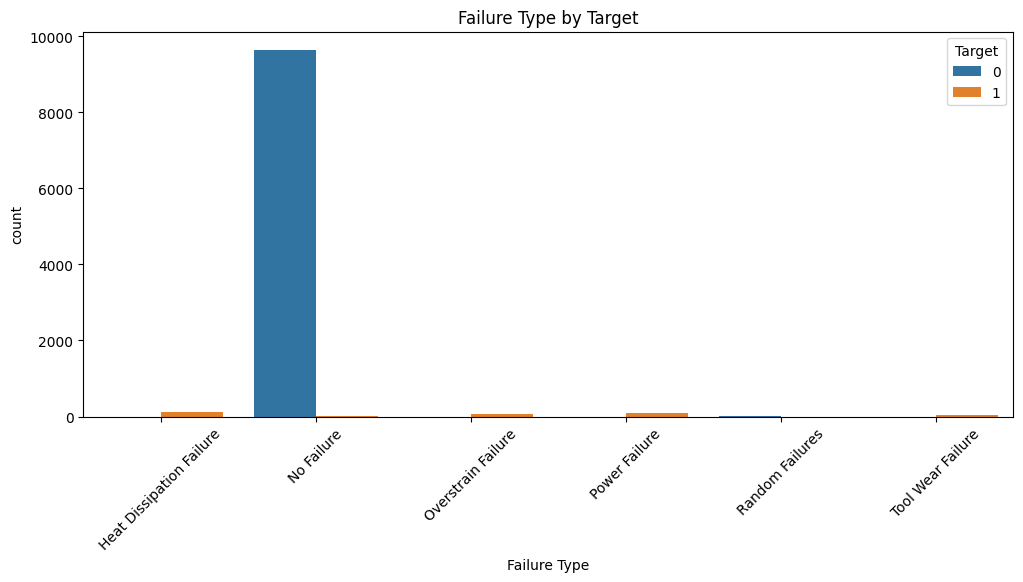

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data (including the encoding fix from the previous answer)
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')

# Drop unnecessary columns
data = data.drop(['UDI'], axis=1)  # Drop UDI
data = data.drop(['Product ID'], axis=1)  # Drop Product ID

#Convert target and Failure type to categories
data['Target'] = data['Target'].astype('category')
data['Failure Type'] = data['Failure Type'].astype('category')

# 2. Basic Information
print("Data shape:", data.shape)
print("\nData Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe()) # Summary statistics for numerical columns
print("\nValue Counts for Target Variable:")
print(data['Target'].value_counts())

# 3. Visualizations
# a. Distribution of Numerical Features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)  # Create subplots
    sns.histplot(data[feature], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {feature}')
plt.tight_layout()  # Adjust subplot parameters for a tight layout.
plt.show()

# b. Distribution of Categorical Features
categorical_features = ['Type', 'Failure Type']

plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(data=data, x=feature)
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

# c. Boxplots of Numerical Features vs. Target Variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, x='Target', y=feature)
    plt.title(f'Boxplot of {feature} vs. Target')
plt.tight_layout()
plt.show()

# d. Correlation Matrix
correlation_matrix = data[numerical_features].corr()  # Compute correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize correlation matrix
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# e. Pairplot (optional, can be slow for large datasets)
# sns.pairplot(data, hue='Target') #  takes a long time.  Use if the dataset is smaller, or restrict the columns.
# plt.show()

#f.Failure type distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Failure Type', hue='Target')
plt.title('Failure Type by Target')
plt.xticks(rotation=45)
plt.show()

Shape of X_train after preprocessing: (8000, 8)
Data type of X_train: float64
Unique values in y_train: [0 1]
Shape of X_train before SMOTE: (8000, 8)
Shape of X_train after SMOTE: (15458, 8)

Value Counts for Target Variable after SMOTE:
Target
0    7729
1    7729
Name: count, dtype: int64
Shape of X_train before RandomOverSampler: (8000, 8)
Shape of X_train after RandomOverSampler: (15458, 8)

Value Counts for Target Variable after RandomOverSampler:
Target
0    7729
1    7729
Name: count, dtype: int64


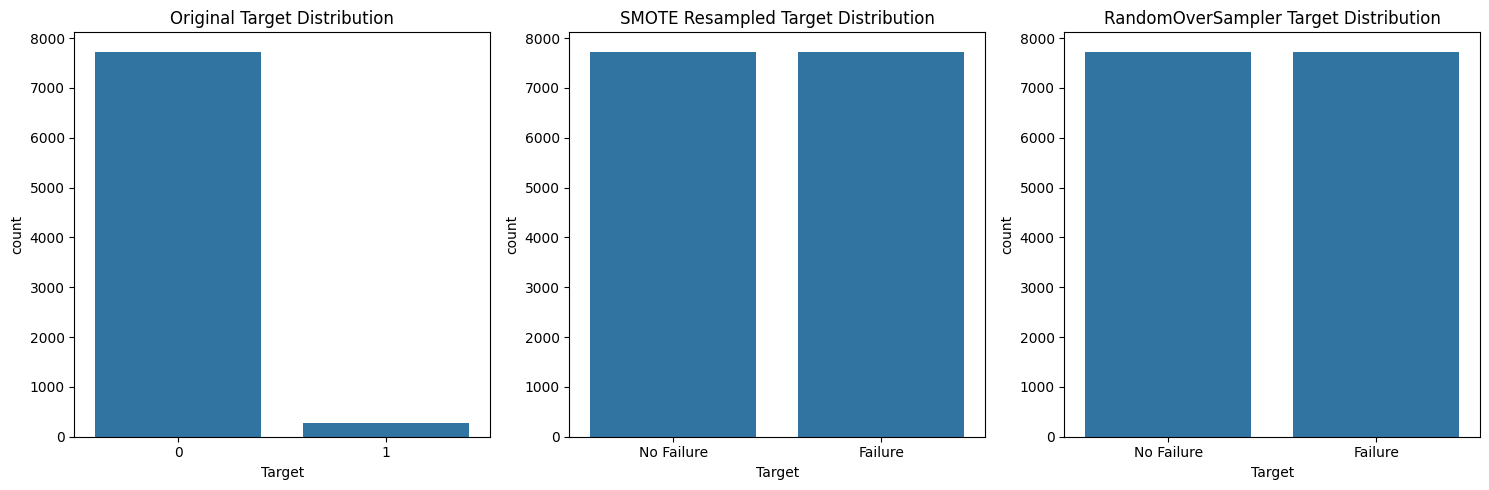

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler

# 1. Load the Data
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')

# 2. Drop unnecessary columns
data = data.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

# 3. Define numerical and categorical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]',
                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']
target = 'Target'

# 4. Split data into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

# 5. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Create Preprocessing Pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
], remainder='passthrough')

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Ensure X_train is fully numerical (Fix for SMOTE issue)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Update column indexes after OneHotEncoding
numerical_features = list(range(5))  # First 5 columns are numerical
categorical_features = list(range(5, X_train.shape[1]))  # Remaining are categorical

print("Shape of X_train after preprocessing:", X_train.shape)
print("Data type of X_train:", X_train.dtype)  # Should be float64
print("Unique values in y_train:", np.unique(y_train))

# 7. Apply Oversampling (SMOTE and RandomOverSampler)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# 8. Print the new distributions
print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("\nValue Counts for Target Variable after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("Shape of X_train before RandomOverSampler:", X_train.shape)
print("Shape of X_train after RandomOverSampler:", X_train_ros.shape)
print("\nValue Counts for Target Variable after RandomOverSampler:")
print(pd.Series(y_train_ros).value_counts())

# 9. Visualize Original vs. Resampled Target Distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=y_train)
plt.title("Original Target Distribution")

plt.subplot(1, 3, 2)
sns.countplot(x=y_train_smote)
plt.title("SMOTE Resampled Target Distribution")
plt.xticks(ticks=[0,1], labels=['No Failure', 'Failure'])

plt.subplot(1, 3, 3)
sns.countplot(x=y_train_ros)
plt.title("RandomOverSampler Target Distribution")
plt.xticks(ticks=[0,1], labels=['No Failure', 'Failure'])

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# 1. Load Data
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')

# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID'], axis=1)

# Separate features and target
X = data.drop(['Failure Type'], axis=1)
y = data['Failure Type'].astype('category').cat.codes  # Convert target to numerical labels

# Identify categorical columns
categorical_cols = ['Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # ✅ FIXED
X_encoded = encoder.fit_transform(X[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Combine numerical and encoded categorical features
X_processed = np.hstack((X_scaled, X_encoded))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2. Define Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate model
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = DNN(input_size, num_classes).to(device)

# 3. Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# 5. Evaluate the Model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/20], Loss: 0.3479
Epoch [2/20], Loss: 0.1430
Epoch [3/20], Loss: 0.1392
Epoch [4/20], Loss: 0.0509
Epoch [5/20], Loss: 0.0192
Epoch [6/20], Loss: 0.0533
Epoch [7/20], Loss: 0.1873
Epoch [8/20], Loss: 0.2103
Epoch [9/20], Loss: 0.0245
Epoch [10/20], Loss: 0.0919
Epoch [11/20], Loss: 0.0116
Epoch [12/20], Loss: 0.0224
Epoch [13/20], Loss: 0.0110
Epoch [14/20], Loss: 0.0153
Epoch [15/20], Loss: 0.0124
Epoch [16/20], Loss: 0.0131
Epoch [17/20], Loss: 0.0360
Epoch [18/20], Loss: 0.0266
Epoch [19/20], Loss: 0.0067
Epoch [20/20], Loss: 0.0075
Test Accuracy: 99.60%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
import numpy as np

# 1. Load and Preprocess Data
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')

# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID'], axis=1)

# Separate features and target
X = data.drop(['Failure Type'], axis=1)
y = data['Failure Type'].astype('category').cat.codes  # Convert target to numerical labels

# Identify categorical columns
categorical_cols = ['Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Combine numerical and encoded categorical features
X_processed = np.hstack((X_scaled, X_encoded))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2. Define PyTorch Model Wrapper for GridSearchCV
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, num_classes, lr=0.001, hidden_units=128, optimizer_type="adam", num_epochs=10):
        self.input_size = input_size
        self.num_classes = num_classes
        self.lr = lr
        self.hidden_units = hidden_units
        self.optimizer_type = optimizer_type
        self.num_epochs = num_epochs
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self._build_model()

    def _build_model(self):
        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_units),
            nn.ReLU(),
            nn.BatchNorm1d(self.hidden_units),
            nn.Dropout(0.3),
            nn.Linear(self.hidden_units, self.num_classes)
        ).to(self.device)

        self.criterion = nn.CrossEntropyLoss()
        if self.optimizer_type == "adam":
            self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        elif self.optimizer_type == "sgd":
            self.optimizer = optim.SGD(self.model.parameters(), lr=self.lr, momentum=0.9)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        self._build_model()
        for epoch in range(self.num_epochs):
            self.model.train()
            for X_batch, y_batch in loader:
                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs, 1)
        return predicted.cpu().numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# 3. Perform Grid Search for Hyperparameter Tuning
param_grid = {
    "lr": [0.01, 0.001, 0.0001],
    "hidden_units": [64, 128, 256],
    "optimizer_type": ["adam", "sgd"],
    "num_epochs": [10, 20]
}

classifier = PyTorchClassifier(input_size=X_train.shape[1], num_classes=len(np.unique(y_train)))
grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print Best Parameters and Accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# 4. Evaluate on Test Set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.2f}%")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-16-fe7c651604cb>", line 81, in fit
ValueError: could not determine the shape of object type 'Series'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are n

Best Parameters: {'hidden_units': 64, 'lr': 0.01, 'num_epochs': 10, 'optimizer_type': 'adam'}
Best Accuracy: nan
Test Accuracy with Best Parameters: 1.00%


Epoch [1/20], Loss: 0.0188, Train Accuracy: 70.09%, Test Accuracy: 98.60%
Epoch [2/20], Loss: 0.0054, Train Accuracy: 95.70%, Test Accuracy: 98.85%
Epoch [3/20], Loss: 0.0025, Train Accuracy: 97.62%, Test Accuracy: 99.30%
Epoch [4/20], Loss: 0.0017, Train Accuracy: 98.25%, Test Accuracy: 99.40%
Epoch [5/20], Loss: 0.0012, Train Accuracy: 98.64%, Test Accuracy: 99.10%
Epoch [6/20], Loss: 0.0010, Train Accuracy: 98.75%, Test Accuracy: 99.20%
Epoch [7/20], Loss: 0.0009, Train Accuracy: 98.83%, Test Accuracy: 99.45%
Epoch [8/20], Loss: 0.0008, Train Accuracy: 99.05%, Test Accuracy: 99.50%
Epoch [9/20], Loss: 0.0007, Train Accuracy: 98.96%, Test Accuracy: 99.35%
Epoch [10/20], Loss: 0.0005, Train Accuracy: 99.08%, Test Accuracy: 99.45%
Epoch [11/20], Loss: 0.0007, Train Accuracy: 99.05%, Test Accuracy: 99.40%
Epoch [12/20], Loss: 0.0006, Train Accuracy: 99.08%, Test Accuracy: 99.35%
Epoch [13/20], Loss: 0.0006, Train Accuracy: 99.16%, Test Accuracy: 99.50%
Epoch [14/20], Loss: 0.0005, Train

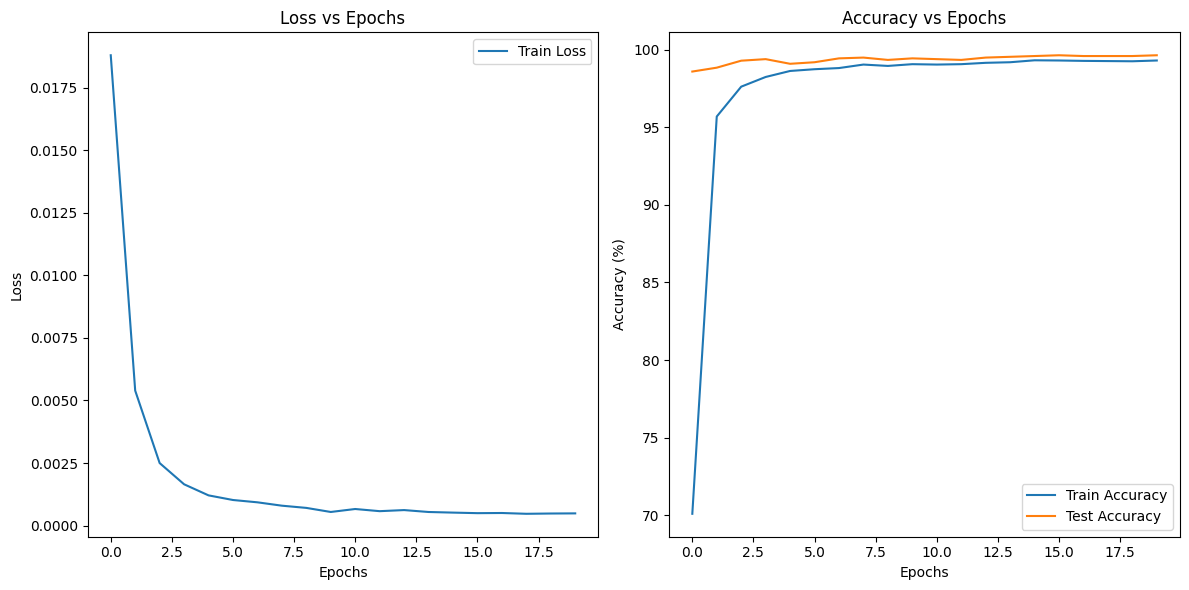

Test Accuracy: 1.00
F1 Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00      1930
           2       0.84      1.00      0.91        16
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         4
           5       1.00      0.78      0.88         9

    accuracy                           1.00      2000
   macro avg       0.81      0.79      0.79      2000
weighted avg       0.99      1.00      1.00      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


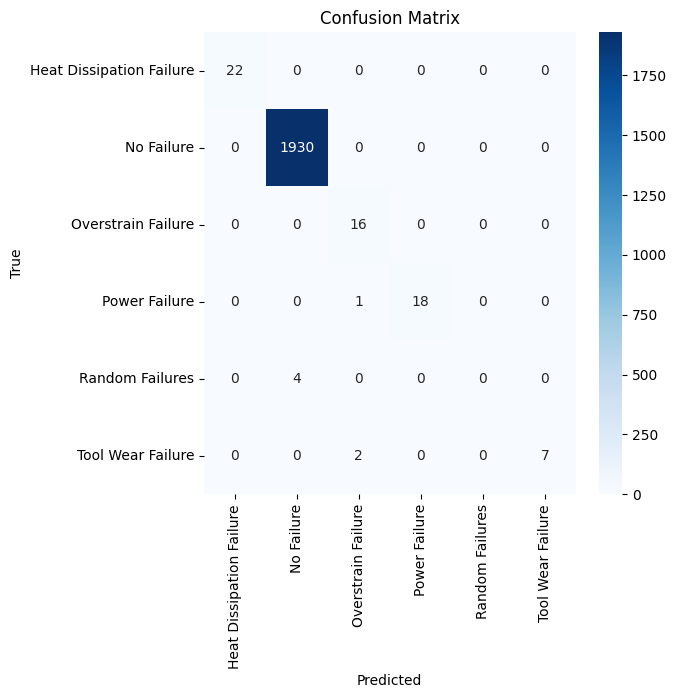

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load Data
data = pd.read_csv("predictive_maintenance.csv", encoding='utf-8')

# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID'], axis=1)

# Separate features and target
X = data.drop(['Failure Type'], axis=1)
y = data['Failure Type']

# Identify categorical columns
categorical_cols = ['Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Combine numerical and encoded categorical features
X_processed = np.hstack((X_scaled, X_encoded))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Convert to PyTorch tensors
X_train = pd.DataFrame(X_train)  # Make sure it's a DataFrame
X_test = pd.DataFrame(X_test)    # Same for X_test

# Ensure all columns are numeric and handle NaN values
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values (here with 0, but you can use other strategies like mean imputation)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# Ensure y_train and y_test are encoded as integers if necessary
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert target variables to PyTorch tensors
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

# 2. Define Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate model
input_size = X_train.shape[1]  # Number of features
num_classes = len(np.unique(y_train))  # Number of classes

model = DNN(input_size, num_classes).to(device)

# 3. Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
num_epochs = 20
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for i in range(0, len(X_train_tensor), 64):  # Batch size of 64
        # Get mini-batch
        X_batch = X_train_tensor[i:i+64]
        y_batch = y_train_tensor[i:i+64]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()

    # Record the loss and accuracy for training
    avg_train_loss = running_train_loss / len(X_train_tensor)
    train_accuracy = 100 * correct_train / total_train

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs.data, 1)
        total_test += y_test_tensor.size(0)
        correct_test += (predicted == y_test_tensor).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# 5. Visualize Training and Test Accuracy, Loss over Epochs
import matplotlib.pyplot as plt

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label="Train Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label="Train Accuracy")
plt.plot(range(num_epochs), test_accuracies, label="Test Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()

# 6. Final Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_test_pred = model(X_test_tensor).argmax(dim=1).cpu().numpy()
print(f"Test Accuracy: {accuracy_score(y_test_encoded, y_test_pred):.2f}")
print(f"F1 Score: {f1_score(y_test_encoded, y_test_pred, average='weighted'):.2f}")
print("Classification Report:\n", classification_report(y_test_encoded, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Training Set Metrics:
Accuracy: 0.9955
Precision: 0.9939
Recall (Sensitivity): 0.9955
F1 Score: 0.9947
Confusion Matrix (Training):
 [[  88    0    2    0    0    0]
 [   4 7714    1    0    0    3]
 [   2    0   59    1    0    0]
 [   2    0    4   69    0    1]
 [   0   14    0    0    0    0]
 [   0    0    2    0    0   34]]

Test Set Metrics:
Accuracy: 0.9965
Precision: 0.9947
Recall (Sensitivity): 0.9965
F1 Score: 0.9955
Confusion Matrix (Test):
 [[  22    0    0    0    0    0]
 [   0 1930    0    0    0    0]
 [   0    0   16    0    0    0]
 [   0    0    1   18    0    0]
 [   0    4    0    0    0    0]
 [   0    0    2    0    0    7]]

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        90
           1       1.00      1.00      1.00      7722
           2       0.87      0.95      0.91        62
           3       0.99      0.91      0.95        76
           4       0.00      0.00  

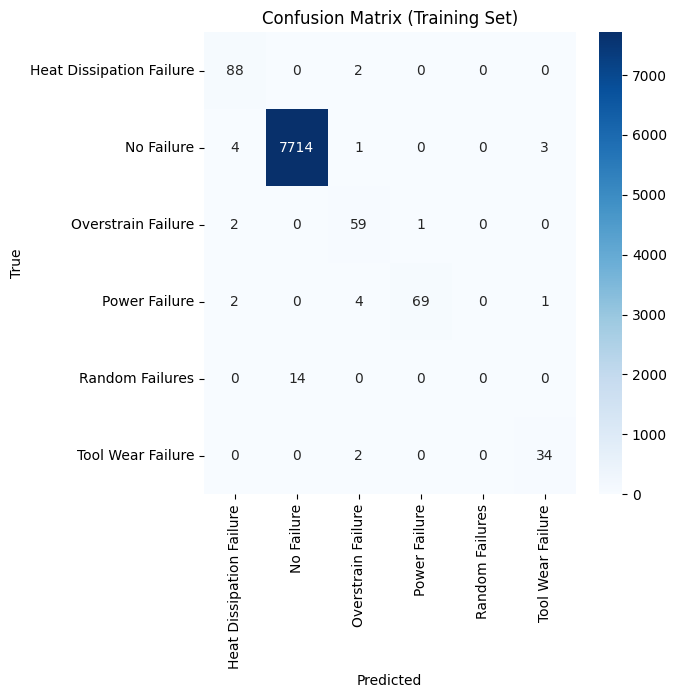

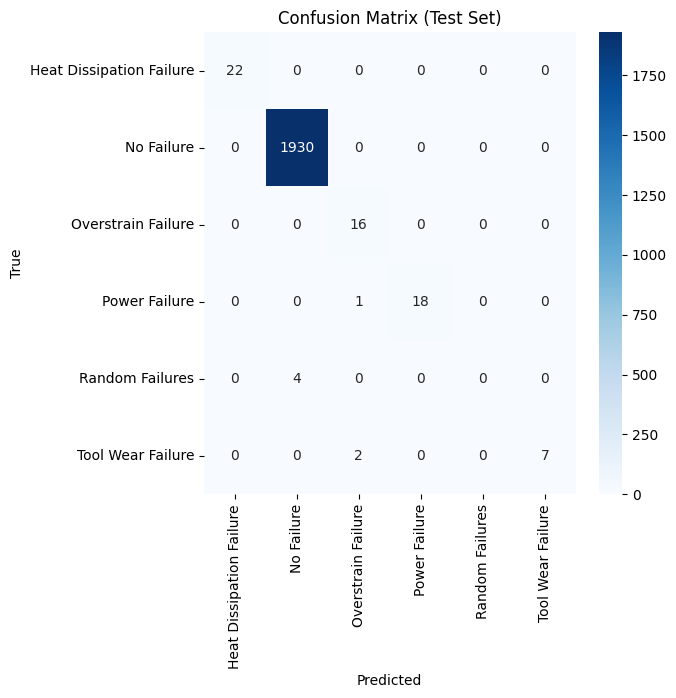

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Evaluate on Training Set
model.eval()
train_outputs = model(X_train_tensor)
_, train_predicted = torch.max(train_outputs.data, 1)

# Convert predictions and ground truth to numpy arrays
train_pred = train_predicted.cpu().numpy()
train_true = y_train_tensor.cpu().numpy()

# Calculate metrics for training set
train_accuracy = accuracy_score(train_true, train_pred)
train_precision = precision_score(train_true, train_pred, average='weighted')
train_recall = recall_score(train_true, train_pred, average='weighted')
train_f1 = f1_score(train_true, train_pred, average='weighted')

print(f"Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall (Sensitivity): {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix (Training):\n", confusion_matrix(train_true, train_pred))

# 2. Evaluate on Test Set
test_outputs = model(X_test_tensor)
_, test_predicted = torch.max(test_outputs.data, 1)

# Convert predictions and ground truth to numpy arrays
test_pred = test_predicted.cpu().numpy()
test_true = y_test_tensor.cpu().numpy()

# Calculate metrics for test set
test_accuracy = accuracy_score(test_true, test_pred)
test_precision = precision_score(test_true, test_pred, average='weighted')
test_recall = recall_score(test_true, test_pred, average='weighted')
test_f1 = f1_score(test_true, test_pred, average='weighted')

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall (Sensitivity): {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("Confusion Matrix (Test):\n", confusion_matrix(test_true, test_pred))

# 3. Classification Report for both Train and Test sets
print("\nClassification Report (Train Set):\n", classification_report(train_true, train_pred))
print("\nClassification Report (Test Set):\n", classification_report(test_true, test_pred))

# 4. Plot Confusion Matrices for both sets
# Training set confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(train_true, train_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Test set confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(test_true, test_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the model with L2 regularization, Dropout, and Batch Normalization
class RegularizedModel(nn.Module):
    def __init__(self):
        super(RegularizedModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.bn1 = nn.BatchNorm1d(64)  # Batch Normalization layer
        self.dropout1 = nn.Dropout(0.5)  # Dropout with 50% drop probability
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(32, len(label_encoder.classes_))  # Output layer (classification)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the model with regularization
regularized_model = RegularizedModel().to(device)

# Define optimizer with L2 regularization (weight decay)
optimizer = optim.Adam(regularized_model.parameters(), lr=0.001, weight_decay=1e-5)

# Loss function
criterion = nn.CrossEntropyLoss()

# Training loop with early stopping and metrics calculation (same as previous)
def train_regularized_model(model, optimizer, criterion, train_loader, test_loader, n_epochs=20):
    train_losses = []
    test_losses = []
    for epoch in range(n_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(running_loss / len(train_loader))

        # Calculate test loss and accuracy
        model.eval()
        correct_test = 0
        total_test = 0
        test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        epoch_test_accuracy = 100 * correct_test / total_test
        test_losses.append(test_loss / len(test_loader))

        print(f'Epoch {epoch+1}/{n_epochs} - Train Loss: {running_loss / len(train_loader):.4f} - Train Accuracy: {epoch_train_accuracy:.2f}% - Test Loss: {test_loss / len(test_loader):.4f} - Test Accuracy: {epoch_test_accuracy:.2f}%')

    return train_losses, test_losses, epoch_train_accuracy, epoch_test_accuracy

# Train the regularized model
train_losses, test_losses, train_accuracy, test_accuracy = train_regularized_model(regularized_model, optimizer, criterion, train_loader, test_loader, n_epochs=20)

# After training, evaluate the model
train_pred = train_predicted.cpu().numpy()
train_true = y_train_tensor.cpu().numpy()
test_pred = test_predicted.cpu().numpy()
test_true = y_test_tensor.cpu().numpy()

# Calculate metrics for the regularized model
train_accuracy = accuracy_score(train_true, train_pred)
train_precision = precision_score(train_true, train_pred, average='weighted')
train_recall = recall_score(train_true, train_pred, average='weighted')
train_f1 = f1_score(train_true, train_pred, average='weighted')

test_accuracy = accuracy_score(test_true, test_pred)
test_precision = precision_score(test_true, test_pred, average='weighted')
test_recall = recall_score(test_true, test_pred, average='weighted')
test_f1 = f1_score(test_true, test_pred, average='weighted')

print(f"Regularized Model - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20 - Train Loss: 0.9087 - Train Accuracy: 80.40% - Test Loss: 0.4209 - Test Accuracy: 97.60%
Epoch 2/20 - Train Loss: 0.2392 - Train Accuracy: 96.74% - Test Loss: 0.1472 - Test Accuracy: 97.60%
Epoch 3/20 - Train Loss: 0.1380 - Train Accuracy: 96.95% - Test Loss: 0.0930 - Test Accuracy: 97.60%
Epoch 4/20 - Train Loss: 0.1102 - Train Accuracy: 96.90% - Test Loss: 0.0774 - Test Accuracy: 97.60%
Epoch 5/20 - Train Loss: 0.0990 - Train Accuracy: 97.00% - Test Loss: 0.0714 - Test Accuracy: 97.60%
Epoch 6/20 - Train Loss: 0.0892 - Train Accuracy: 97.06% - Test Loss: 0.0670 - Test Accuracy: 97.60%
Epoch 7/20 - Train Loss: 0.0817 - Train Accuracy: 97.05% - Test Loss: 0.0640 - Test Accuracy: 97.60%
Epoch 8/20 - Train Loss: 0.0793 - Train Accuracy: 97.25% - Test Loss: 0.0623 - Test Accuracy: 97.65%
Epoch 9/20 - Train Loss: 0.0761 - Train Accuracy: 97.16% - Test Loss: 0.0618 - Test Accuracy: 97.60%
Epoch 10/20 - Train Loss: 0.0735 - Train Accuracy: 97.19% - Test Loss: 0.0604 - Test Accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
